# Generalization with OOP: The MLBacktester Class

## Using the MLBacktester Class

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [2]:
df = pd.read_csv("five_minute_pairs.csv", parse_dates = ["time"], index_col = "time")
df

,EURUSD,GBPUSD,EURAUD
time,,,
2019-01-01 22:00:00+00:00,1.146580,1.274680,1.626230
2019-01-01 22:05:00+00:00,1.146350,1.274270,1.626170
2019-01-01 22:10:00+00:00,1.146320,1.274760,1.626290
2019-01-01 22:15:00+00:00,1.146320,1.274770,1.626290
2019-01-01 22:20:00+00:00,1.146530,1.274760,1.625620
...,...,...,...
2020-08-30 23:35:00+00:00,1.190895,1.335140,1.617190
2020-08-30 23:40:00+00:00,1.191240,1.335250,1.616890
2020-08-30 23:45:00+00:00,1.191515,1.335515,1.616870


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 124056 entries, 2019-01-01 22:00:00+00:00 to 2020-08-30 23:55:00+00:00
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   EURUSD  123350 non-null  float64
 1   GBPUSD  123169 non-null  float64
 2   EURAUD  123742 non-null  float64
dtypes: float64(3)
memory usage: 3.8 MB


In [4]:
import MLBacktester as MLB

### EURUSD

In [5]:
symbol = "EURUSD"

In [6]:
ptc = 0.00007

In [7]:
ml = MLB.MLBacktester(symbol, "2019-01-01", "2020-08-31", ptc)

In [8]:
ml

MLBacktester(symbol = EURUSD, start = 2019-01-01, end = 2020-08-31, tc = 7e-05)

In [9]:
ml.data

,price,returns
time,,
2019-01-01 22:00:00+00:00,1.146580,NaN
2019-01-01 22:05:00+00:00,1.146350,-0.000201
2019-01-01 22:10:00+00:00,1.146320,-0.000026
2019-01-01 22:15:00+00:00,1.146320,0.000000
2019-01-01 22:20:00+00:00,1.146530,0.000183
...,...,...
2020-08-30 23:35:00+00:00,1.190895,-0.000080
2020-08-30 23:40:00+00:00,1.191240,0.000290
2020-08-30 23:45:00+00:00,1.191515,0.000231


In [10]:
ml.test_strategy(train_ratio = 0.7, lags = 5)

(444.451141, 443.38023)

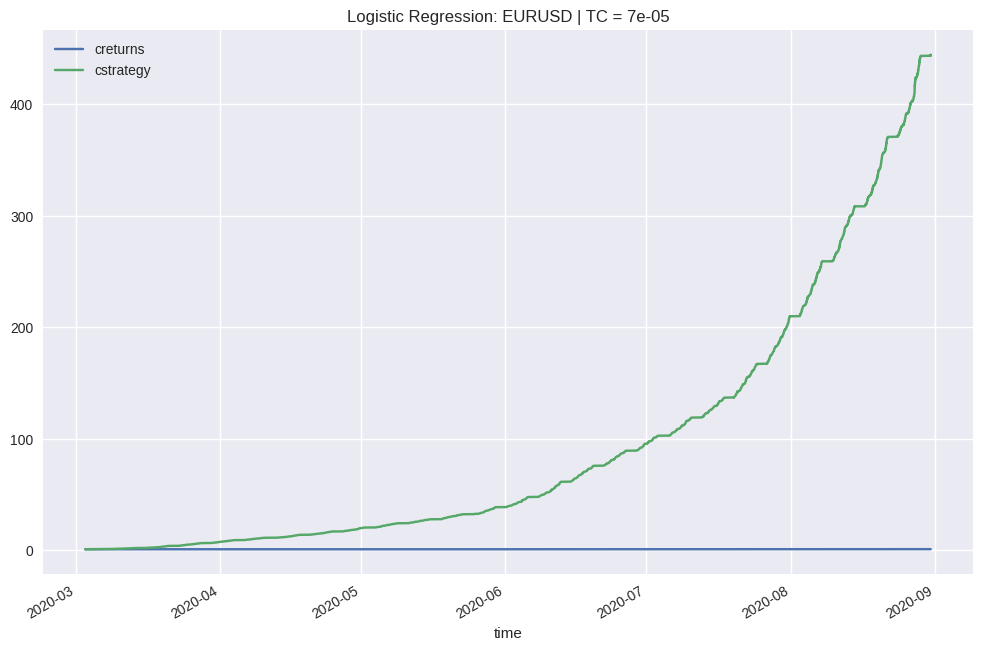

In [11]:
ml.plot_results()

In [12]:
ml.results

,price,returns,lag1,lag2,lag3,lag4,lag5,Ask_Dir,SMA,SMA_Dir,...,RSI_Dir,fastk,fastd,fastk_Dir,fastd_Dir,pred,strategy,trades,creturns,cstrategy
time,,,,,,,,,,,,,,,,,,,,,
2020-03-03 01:35:00+00:00,1.112940,0.000121,-0.000058,0.000121,0.000431,-0.000108,-0.000535,1,1.112948,1,...,1,100.000000,98.836353,1,0,1.0,0.000121,0.0,1.000121,1.000121
2020-03-03 01:40:00+00:00,1.113540,0.000539,0.000121,-0.000058,0.000121,0.000431,-0.000108,0,1.112956,0,...,0,100.000000,98.836353,0,0,1.0,0.000539,0.0,1.000660,1.000660
2020-03-03 01:45:00+00:00,1.113340,-0.000180,0.000539,0.000121,-0.000058,0.000121,0.000431,0,1.112955,0,...,0,82.492817,94.164272,0,0,-1.0,0.000040,2.0,1.000481,1.000700
2020-03-03 01:50:00+00:00,1.113265,-0.000067,-0.000180,0.000539,0.000121,-0.000058,0.000121,0,1.112953,0,...,0,76.117707,86.203508,0,0,-1.0,0.000067,0.0,1.000413,1.000768
2020-03-03 01:55:00+00:00,1.113220,-0.000040,-0.000067,-0.000180,0.000539,0.000121,-0.000058,0,1.112950,0,...,0,64.317441,74.309321,0,0,-1.0,0.000040,0.0,1.000373,1.000808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-30 23:35:00+00:00,1.190895,-0.000080,-0.000092,0.000298,0.000046,0.000000,-0.000151,1,1.190894,1,...,1,37.222175,67.775304,1,0,-1.0,0.000080,0.0,1.070174,444.207506
2020-08-30 23:40:00+00:00,1.191240,0.000290,-0.000080,-0.000092,0.000298,0.000046,0.000000,1,1.190899,1,...,1,100.000000,67.775304,0,1,1.0,0.000150,2.0,1.070484,444.273989
2020-08-30 23:45:00+00:00,1.191515,0.000231,0.000290,-0.000080,-0.000092,0.000298,0.000046,1,1.190938,1,...,1,100.000000,79.074058,0,1,1.0,0.000231,0.0,1.070731,444.376550


__The optimal Number of Lags__

In [13]:
for lags in range(1, 21):
    print(lags, ml.test_strategy(train_ratio = 0.7, lags = lags))

1 (444.451141, 443.38023)
2 (444.451141, 443.38023)
3 (444.451141, 443.38023)
4 (444.451141, 443.38023)
5 (444.451141, 443.38023)
6 (444.451141, 443.38023)
7 (444.451141, 443.38023)
8 (444.451141, 443.38023)
9 (444.451141, 443.38023)
10 (444.451141, 443.38023)
11 (444.237337, 443.166426)
12 (444.375519, 443.304608)
13 (444.451141, 443.38023)
14 (444.451141, 443.38023)
15 (444.451141, 443.38023)
16 (444.451141, 443.38023)
17 (444.451141, 443.38023)
18 (444.451141, 443.38023)
19 (444.451141, 443.38023)
20 (444.451141, 443.38023)


In [14]:
ml.results.trades.value_counts()

0.0    21926
2.0    15060
Name: trades, dtype: int64

### EURAUD

In [15]:
symbol = "EURAUD"

In [16]:
ml = MLB.MLBacktester(symbol, "2019-01-01", "2020-08-31", ptc)

In [17]:
ml.test_strategy(train_ratio = 0.7, lags = 15)

(13442.546458, 13441.596714)

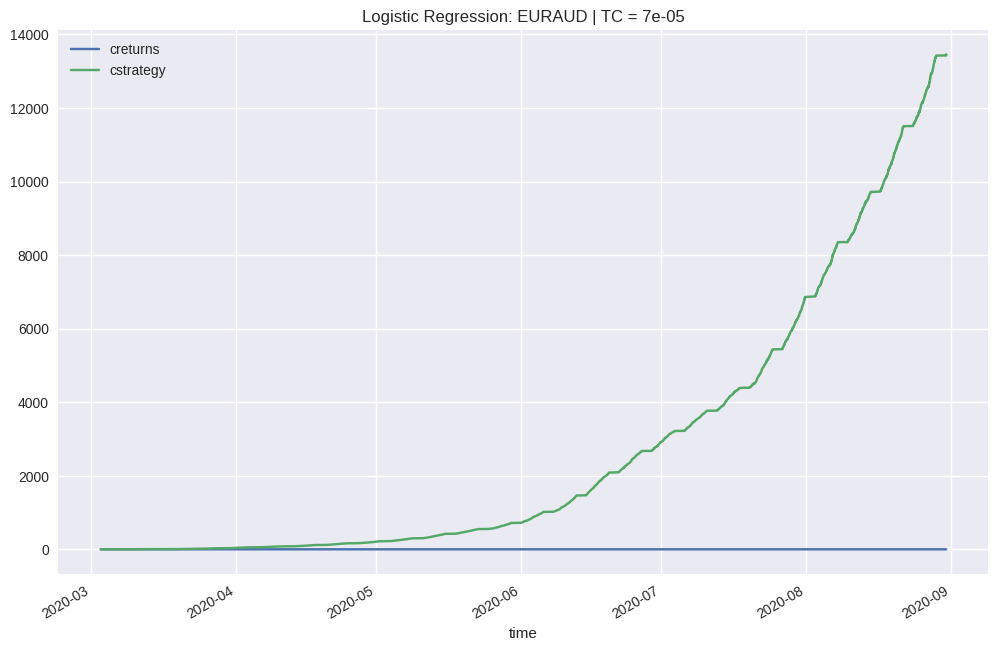

In [18]:
ml.plot_results()

__The optimal Number of Lags__

In [19]:
for lags in range(1, 21):
    print(lags, ml.test_strategy(train_ratio = 0.7, lags = lags))

1 (13470.966594, 13470.016849)
2 (13445.51036, 13444.560615)
3 (13442.546458, 13441.596714)
4 (13442.546458, 13441.596714)
5 (13444.286157, 13443.336412)
6 (13442.828257, 13441.878513)
7 (13442.546458, 13441.596714)
8 (13442.546458, 13441.596714)
9 (13442.546458, 13441.596714)
10 (13442.546458, 13441.596714)
11 (13442.546458, 13441.596714)
12 (13442.546458, 13441.596714)
13 (13442.546458, 13441.596714)
14 (13442.546458, 13441.596714)
15 (13442.546458, 13441.596714)
16 (13442.546458, 13441.596714)
17 (13442.546458, 13441.596714)
18 (13442.546458, 13441.596714)
19 (13442.546458, 13441.596714)
20 (13470.966594, 13470.016849)


In [20]:
ml.results

,price,returns,lag1,lag2,lag3,lag4,lag5,lag6,lag7,lag8,...,RSI_Dir,fastk,fastd,fastk_Dir,fastd_Dir,pred,strategy,trades,creturns,cstrategy
time,,,,,,,,,,,,,,,,,,,,,
2020-03-02 23:55:00+00:00,1.701685,-0.000482,-0.000634,-0.000364,-0.000238,0.000050,0.000176,-0.000047,0.000065,0.000285,...,1,0.000000,0.000000e+00,1,1,-1.0,0.000482,0.0,0.999518,1.000482
2020-03-03 00:00:00+00:00,1.703020,0.000784,-0.000482,-0.000634,-0.000364,-0.000238,0.000050,0.000176,-0.000047,0.000065,...,1,64.255652,2.141855e+01,1,1,1.0,0.000644,2.0,1.000302,1.001127
2020-03-03 00:05:00+00:00,1.703940,0.000540,0.000784,-0.000482,-0.000634,-0.000364,-0.000238,0.000050,0.000176,-0.000047,...,0,100.000000,5.475188e+01,0,1,1.0,0.000540,0.0,1.000843,1.001667
2020-03-03 00:10:00+00:00,1.703895,-0.000026,0.000540,0.000784,-0.000482,-0.000634,-0.000364,-0.000238,0.000050,0.000176,...,0,98.217867,8.749117e+01,0,1,1.0,-0.000026,0.0,1.000816,1.001641
2020-03-03 00:15:00+00:00,1.703560,-0.000197,-0.000026,0.000540,0.000784,-0.000482,-0.000634,-0.000364,-0.000238,0.000050,...,0,84.612103,9.427666e+01,0,0,-1.0,0.000057,2.0,1.000620,1.001698
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-30 23:35:00+00:00,1.617190,-0.000108,0.000040,-0.000043,0.000006,0.000012,0.000121,0.000099,-0.000083,0.000195,...,0,0.000000,4.564589e+01,0,0,-1.0,-0.000032,2.0,0.949889,13469.561935
2020-08-30 23:40:00+00:00,1.616890,-0.000186,-0.000108,0.000040,-0.000043,0.000006,0.000012,0.000121,0.000099,-0.000083,...,0,0.000000,2.681568e+01,0,0,-1.0,0.000186,0.0,0.949712,13472.061096
2020-08-30 23:45:00+00:00,1.616870,-0.000012,-0.000186,-0.000108,0.000040,-0.000043,0.000006,0.000012,0.000121,0.000099,...,1,0.000000,1.468455e-13,1,1,-1.0,0.000012,0.0,0.949701,13472.227739


In [21]:
hits = np.sign(ml.results.returns * ml.results.pred).value_counts()
hits

 1.0    32027
-1.0     4936
 0.0      141
dtype: int64

In [22]:
hit_ratio = hits[1.0] / sum(hits)
hit_ratio

0.8631683915480811